### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset and Printing Columns in the Dataset

In [2]:
df = pd.read_csv("houses_dataset.csv")
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
#List columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Printing the datatype of columns

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
#Descriptive statistics summary of SalePrice column

df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## a. Delete all the outlier data for the GarageArea field (for the same data set in the use case: House Prices).

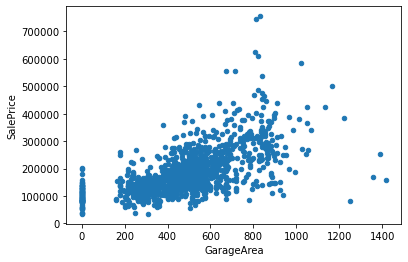

In [6]:
#Scatter plot with GarageArea on x-axis and SalePrice on y-axis
#through plot it is clear that the plot has anamoly data after 1000 and below 200

df.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice')
plt.show()

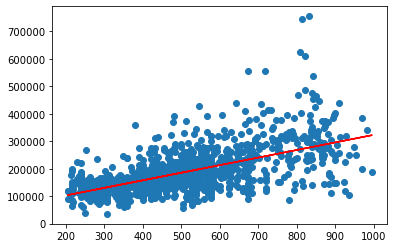

In [7]:
# Delete all the outlier data for the GarageArea field 
# Removing data after 1000 and below 200 and plotting the graph again with regression line

filtr = df[(df.GarageArea <1000) & (df.GarageArea >200)]
plt.scatter(filtr.GarageArea, filtr.SalePrice)
m, b = np.polyfit(filtr.GarageArea, filtr.SalePrice, 1)
plt.plot(filtr.GarageArea, m*filtr.GarageArea+b, color='red')
plt.show()

## b. Using simple regression select one feature that is positively correlated with ‘SalePrice’ create a regression model and plot the regression line between the two features.

In [8]:
# select one feature that is positively correlated with ‘SalePrice’

numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:2],'\n')

SalePrice      1.000000
OverallQual    0.790982
Name: SalePrice, dtype: float64 



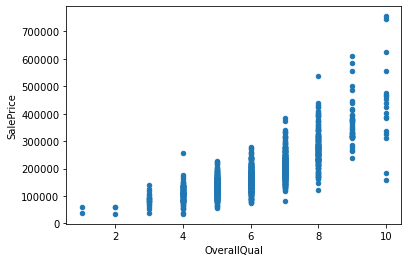

In [9]:
#simple regression to select one feature that is positively correlated with ‘SalePrice’ to create a regression model

df.plot(kind = 'scatter', x = 'OverallQual', y = 'SalePrice')
plt.show()

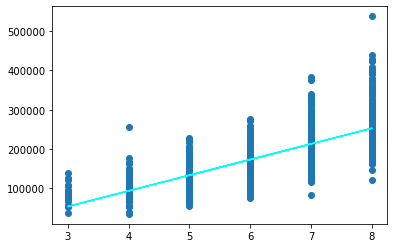

In [10]:
# ploting the regression line between the two features

filtr1 = df[(df.OverallQual <9) & (df.OverallQual >2)]
plt.scatter(filtr1.OverallQual, filtr1.SalePrice)
m, b = np.polyfit(filtr1.OverallQual, filtr1.SalePrice, 1)
plt.plot(filtr1.OverallQual, m*filtr1.OverallQual+b, color='cyan')
plt.show()

## Predicting Skewness
### Skewness tells us about the direction of outliers. Here the distribution is showing positive skew, hence converted to normal distribution

1.8828757597682129


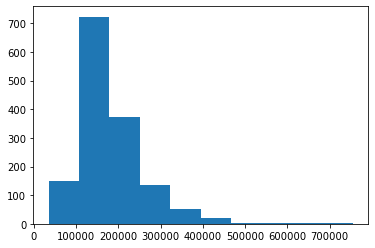

In [11]:
#predicting Skewness to determine the distribution of data

print(df.SalePrice.skew())
plt.hist(df.SalePrice)
plt.show()


skew is 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

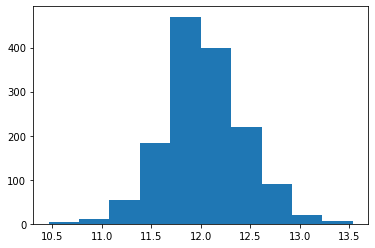

In [12]:
# Above the distribution is positively skew so need to convert it into symmetric or normal distribution

target = np.log(df.SalePrice)
print('skew is', target.skew())
plt.hist(target)


In [13]:
# pivot table showing positive correlation between SalePrice and OverallQual

quality_pivot = df.pivot_table(index='OverallQual', values='SalePrice', 
                                  aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


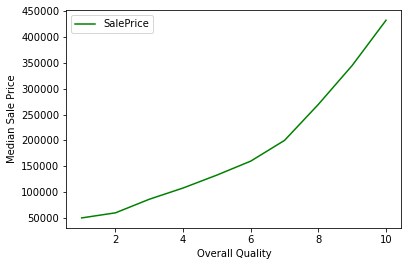

In [14]:
#Pivot plot for better understanding the correlation between SalePrice And Overall Quality
quality_pivot.plot(kind='line', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

## c. Find top 5 most correlated features to the target label(SalePrice) and then build a model using those 5 features.

In [15]:
#5 most correlated features to the SalePrice

numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:6],'\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64 



### Handling Null Values

In [16]:
# handling null values to prepare data for modeling
# %age of missing data in different columns of houses_dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageYrBlt,81,5.5
GarageCond,81,5.5
GarageType,81,5.5
GarageFinish,81,5.5


In [17]:
#filling null values with average value

data = df.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))


0


In [18]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
#identifying datatype of houses dataset columns based on numbers data type

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [20]:
# Converting non-numerical values into numerical values

categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
#Street column is categorical data need to convert it to be a numeric value

print(categoricals["Street"].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [22]:
street_names = {"Street":     {"Pave": 1, "Grvl": 2}}

In [23]:
categoricals = categoricals.replace(street_names)
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,1,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,1,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [24]:
#RoofStyle is categorical data need to convert it to be a numeric value

print(categoricals["RoofStyle"].value_counts())

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


In [25]:
categoricals["RoofStyle"] = categoricals["RoofStyle"].astype('category')
categoricals.RoofStyle.dtypes

CategoricalDtype(categories=['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], ordered=False)

In [26]:
categoricals["RoofStyle_cat"] = categoricals["RoofStyle"].cat.codes
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,RoofStyle_cat
0,RL,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
1,RL,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
2,RL,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
3,RL,1,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,1
4,RL,1,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1


In [27]:
df.Street.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [28]:
#Street data converted to int
categoricals.Street.head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64

In [29]:
#RoofStyle data converted to int

categoricals.RoofStyle_cat.value_counts()

1    1141
3     286
0      13
2      11
4       7
5       2
Name: RoofStyle_cat, dtype: int64

In [30]:
#Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.KitchenQual = le.fit_transform(df.KitchenQual.astype(str))

In [31]:
list(le.classes_)

['Ex', 'Fa', 'Gd', 'TA']

In [32]:
print(df.KitchenQual.value_counts())
print(df.KitchenQual.isnull().sum())

3    735
2    586
0    100
1     39
Name: KitchenQual, dtype: int64
0


### Build a linear model

In [33]:
#Build linear Model

y = np.log(df.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [42]:
# train_test_split() function from scikit-learn to create a training set and a hold-out set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

## d. Apply PCA on the same dataset then apply regression model on the PCA result and report your observation after you evaluate the model.

In [43]:
# Here I decompose each row into 10 principal components

from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 10)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 10)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.989481
1   PCA Component 2                  0.003741
2   PCA Component 3                  0.002562
3   PCA Component 4                  0.002130
4   PCA Component 5                  0.000872
5   PCA Component 6                  0.000368
6   PCA Component 7                  0.000229
7   PCA Component 8                  0.000202
8   PCA Component 9                  0.000156
9  PCA Component 10                  0.000114


In [44]:
#Sorting the values of the first principal component by how large each one is

df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head()

,PCA,Variable Names
2,0.999765,LotArea
15,0.012072,GrLivArea
11,0.010430,TotalBsmtSF
12,0.010141,1stFlrSF
8,0.009195,BsmtFinSF1


### Creating a Linear Regression model and instantiate the model

In [45]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [46]:
# fitting the model

model = lr.fit(X_train, y_train)

## e. Evaluate all the models using MAE, MSE, RMSE and R2 score.

In [47]:
#The model.score() method returns the r-squared value by default.

print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8627547060335217


In [48]:
#Print the intercept

print('Intercept: ', model.intercept_)

Intercept:  9.703898984198538


In [49]:
# Calculating RMSE. To do so, use the model we have built to make predictions on the test data set.

predictions = model.predict(X_test)

In [50]:
#The mean_squared_error function takes two arrays and calculates the rmse

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023390905304162844


In [51]:
#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
print ('MAE is: \n', mean_absolute_error(y_test, predictions))

MAE is: 
 0.11129925406363682


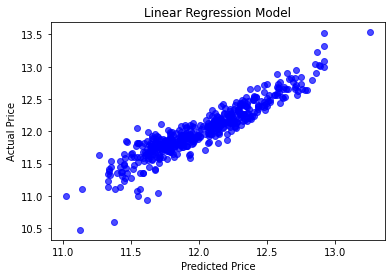

In [52]:
# Graphical view Showing relationship between Actual price and Predicted Price

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()